<a href="https://colab.research.google.com/github/SmitM1/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [ ]:
#loading the dataset
df = pd.read_csv('/content/HousingData.csv')

In [ ]:
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


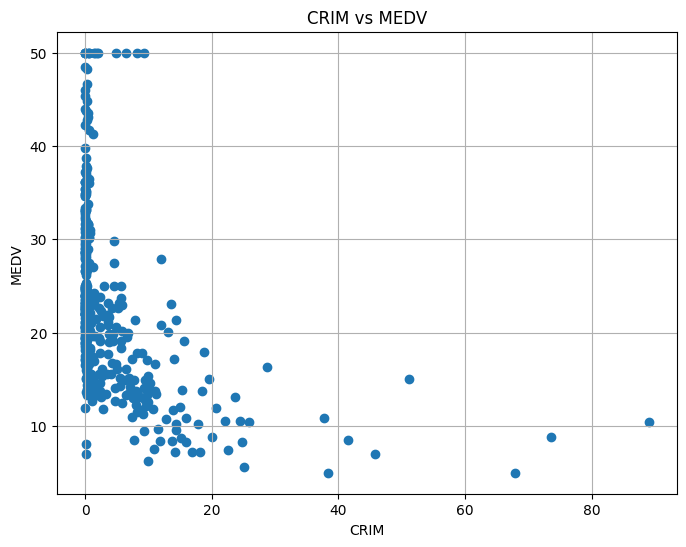

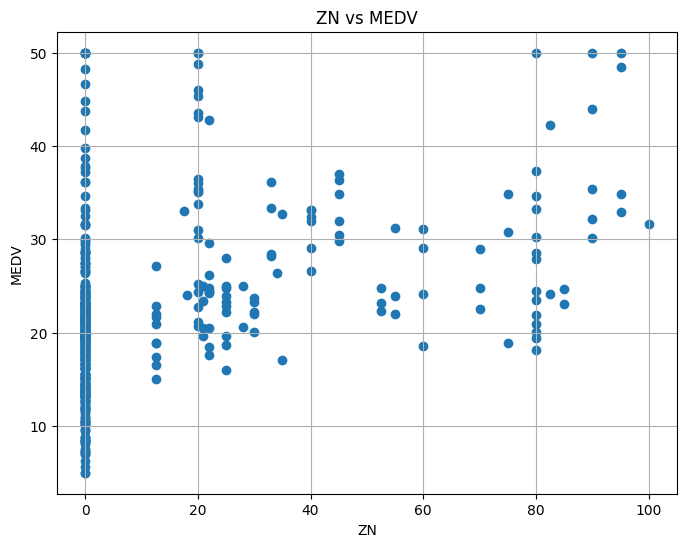

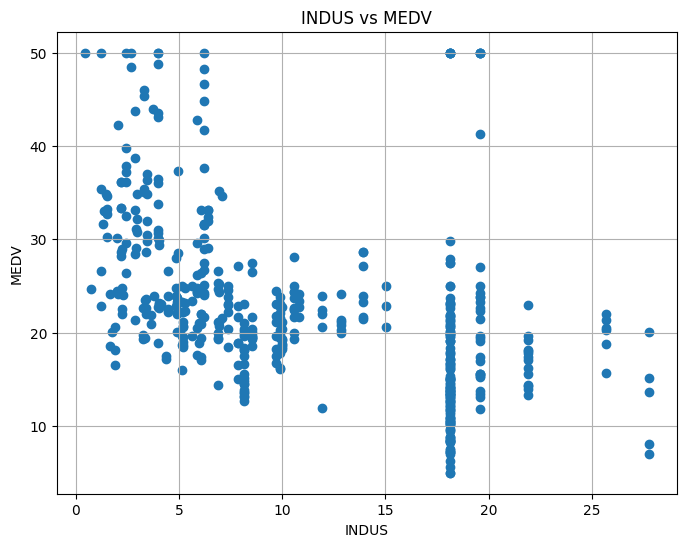

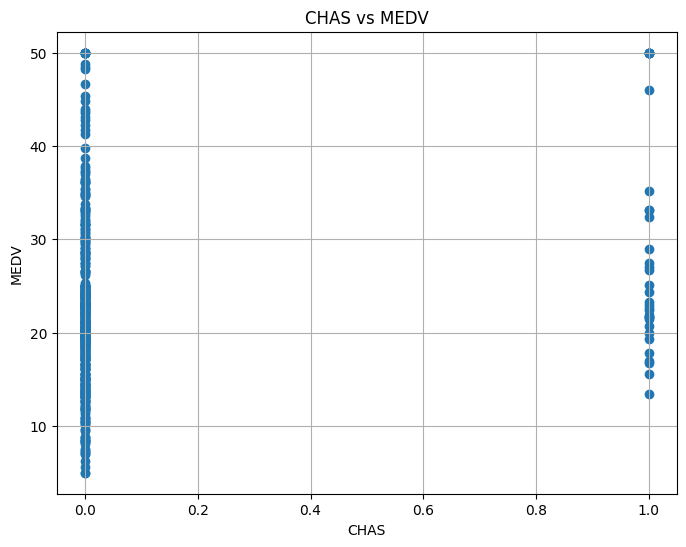

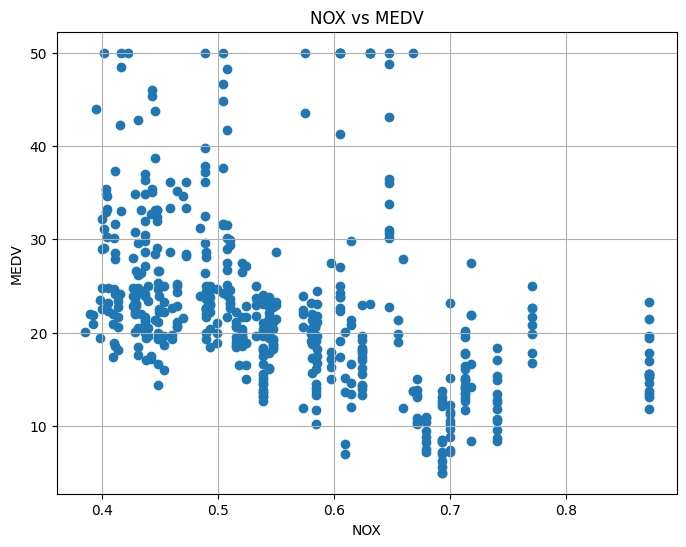

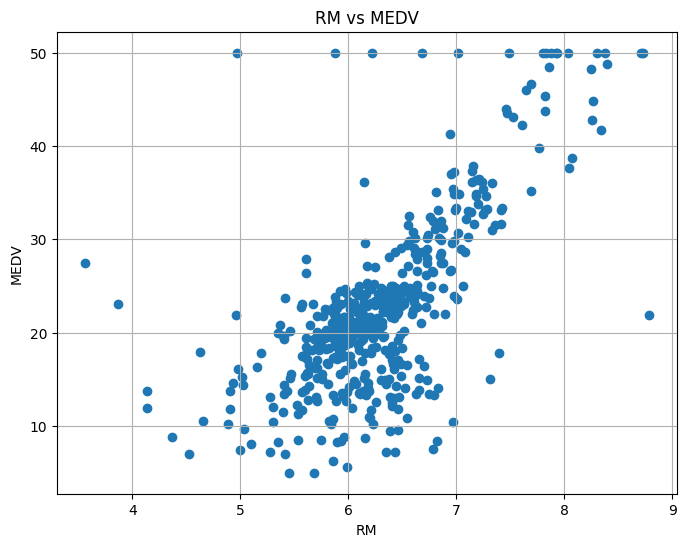

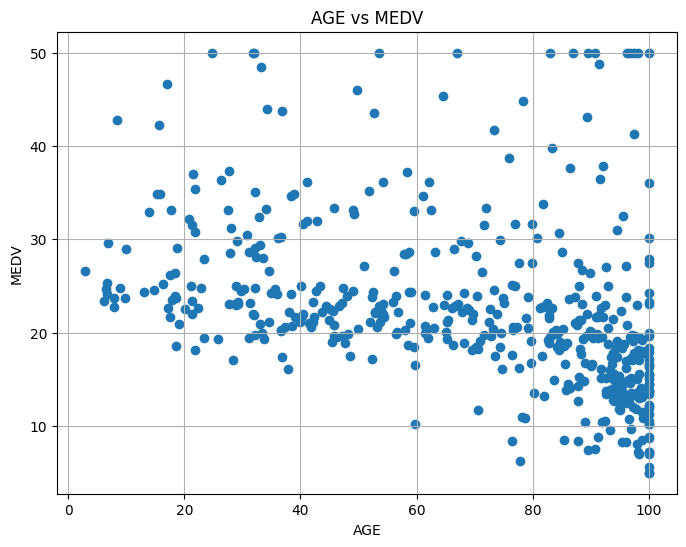

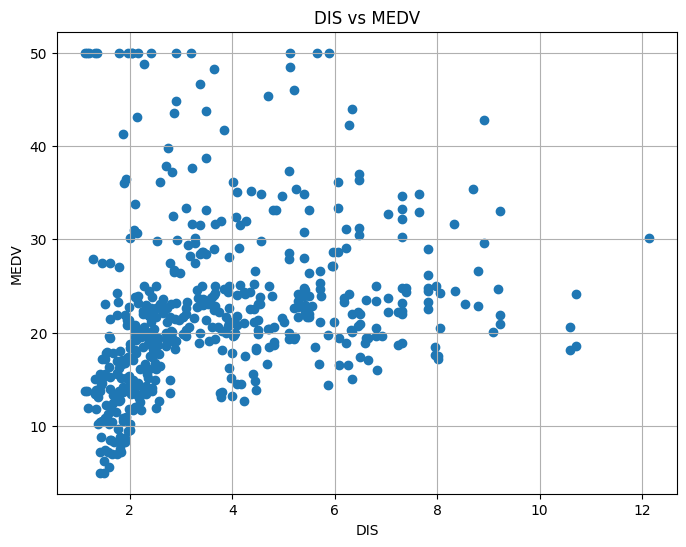

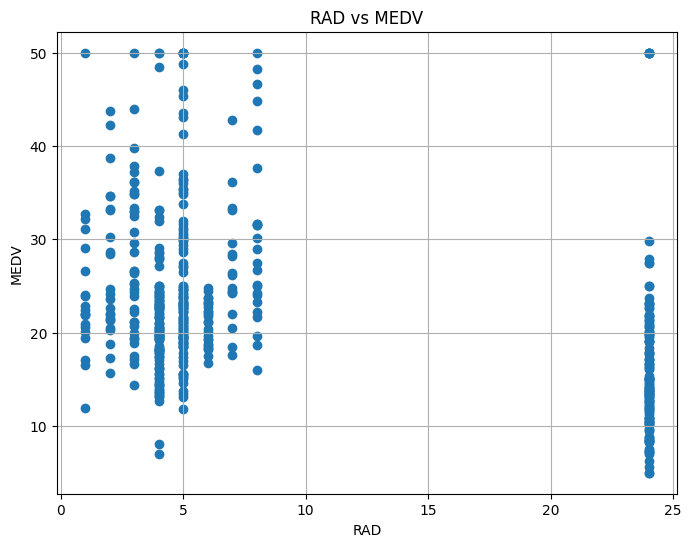

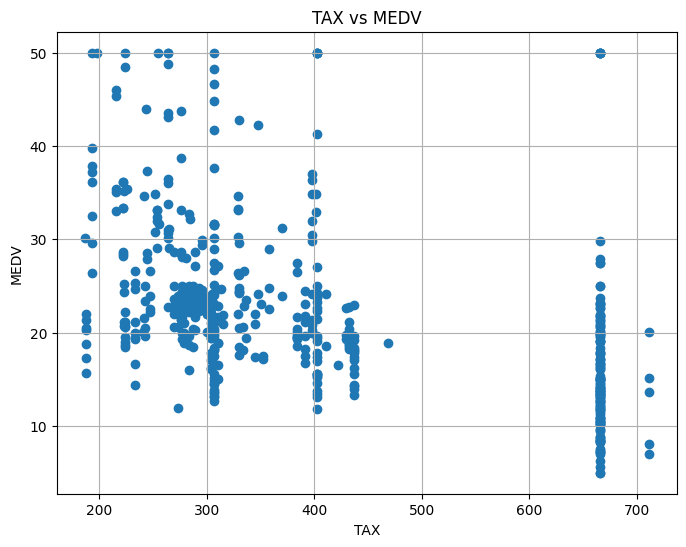

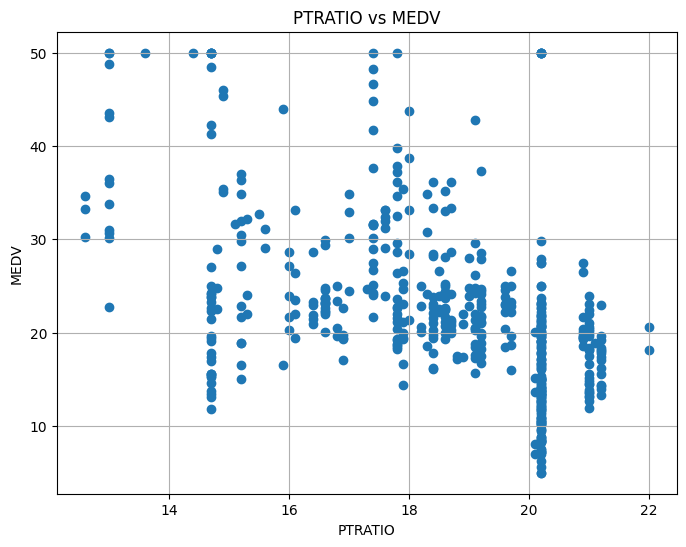

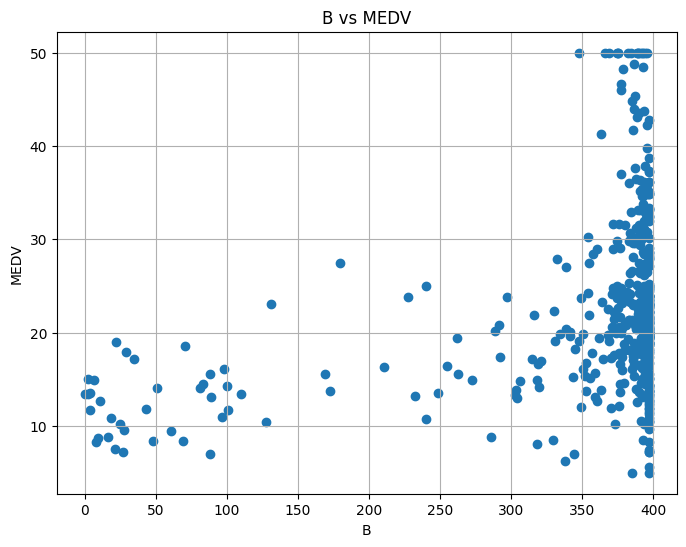

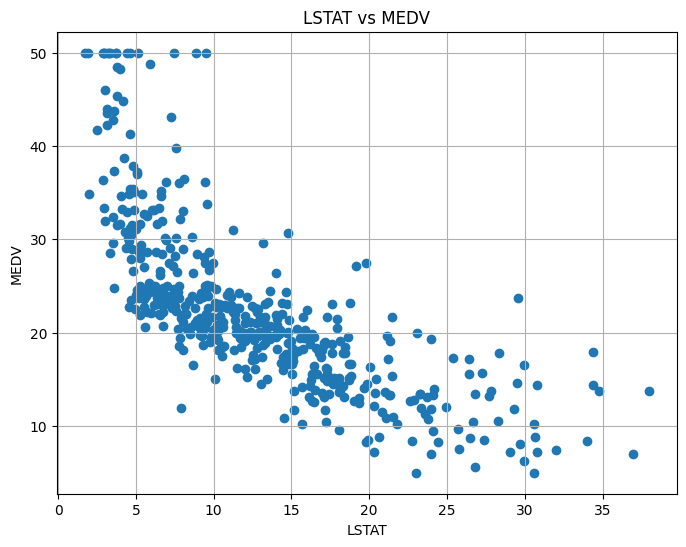

In [ ]:
# Create scatter plots for each column against the Performance Index
columns_to_plot = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.scatter(df[column], df['MEDV'])
    plt.xlabel(column)
    plt.ylabel('MEDV')
    plt.title(f'{column} vs MEDV')
    plt.grid(True)
    plt.show()

# Show the plot
plt.show()

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
y = df['MEDV']
X = df.drop(['MEDV'], axis=1)

In [ ]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
X_columns = X.columns
X_columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
X

array([[-0.4138979 ,  0.2905253 , -1.28483988, ..., -1.45900038,
         0.44105193, -1.08210487],
       [-0.41148837, -0.47986431, -0.58779822, ..., -0.30309415,
         0.44105193, -0.50016501],
       [-0.41149066, -0.47986431, -0.58779822, ..., -0.30309415,
         0.39642699, -1.21499979],
       ...,
       [-0.40764849, -0.47986431,  0.12388718, ...,  1.17646583,
         0.44105193, -0.98977787],
       [-0.40204307, -0.47986431,  0.12388718, ...,  1.17646583,
         0.4032249 , -0.87227079],
       [-0.409181  , -0.47986431,  0.12388718, ...,  1.17646583,
         0.44105193, -0.67642564]])

In [ ]:
X = pd.DataFrame(X, columns = X_columns)

In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.413898,0.290525,-1.284840,-0.274265,-0.144217,0.413672,-0.118643,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.082105
1,-0.411488,-0.479864,-0.587798,-0.274265,-0.740262,0.194274,0.371156,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.500165
2,-0.411491,-0.479864,-0.587798,-0.274265,-0.740262,1.282714,-0.265225,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.215000
3,-0.410908,-0.479864,-1.303877,-0.274265,-0.835284,1.016303,-0.812226,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.367479
4,-0.406697,-0.479864,-1.303877,-0.274265,-0.835284,1.228577,-0.511911,1.077737,-0.752922,-1.106115,0.113032,0.441052,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.407434,-0.479864,0.123887,-0.274265,0.158124,0.439316,0.020789,-0.625796,-0.982843,-0.803212,1.176466,0.387217,NaN
502,-0.409427,-0.479864,0.123887,-0.274265,0.158124,-0.234548,0.292502,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.508558
503,-0.407648,-0.479864,0.123887,-0.274265,0.158124,0.984960,0.803751,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.989778
504,-0.402043,-0.479864,0.123887,-0.274265,0.158124,0.725672,0.742973,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.872271


In [ ]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [ ]:
X = X.fillna(df.mean())

In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.413898,0.290525,-1.284840,-0.274265,-0.144217,0.413672,-0.118643,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.082105
1,-0.411488,-0.479864,-0.587798,-0.274265,-0.740262,0.194274,0.371156,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.500165
2,-0.411491,-0.479864,-0.587798,-0.274265,-0.740262,1.282714,-0.265225,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.215000
3,-0.410908,-0.479864,-1.303877,-0.274265,-0.835284,1.016303,-0.812226,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.367479
4,-0.406697,-0.479864,-1.303877,-0.274265,-0.835284,1.228577,-0.511911,1.077737,-0.752922,-1.106115,0.113032,0.441052,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.407434,-0.479864,0.123887,-0.274265,0.158124,0.439316,0.020789,-0.625796,-0.982843,-0.803212,1.176466,0.387217,12.715432
502,-0.409427,-0.479864,0.123887,-0.274265,0.158124,-0.234548,0.292502,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.508558
503,-0.407648,-0.479864,0.123887,-0.274265,0.158124,0.984960,0.803751,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.989778
504,-0.402043,-0.479864,0.123887,-0.274265,0.158124,0.725672,0.742973,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.872271


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
403,2.432476,-0.479864,1.027405,-0.274265,1.194724,-1.332960,0.982510,-0.994588,1.661245,1.530926,0.806576,0.441052,0.986859
19,-0.331306,-0.479864,-0.431110,-0.274265,-0.144217,-0.794439,0.035090,0.000693,-0.637962,-0.601276,1.176466,0.375814,-0.200802
345,-0.411050,-0.479864,-0.980250,-0.274265,-0.973497,-0.385562,-0.715696,2.005372,-0.752922,-0.334008,0.159268,0.317593,-0.305719
160,-0.268437,-0.479864,1.244133,3.646110,0.434551,-0.049342,0.860954,-0.949142,-0.523001,-0.031105,-1.736418,-0.194662,-1.009362
229,3.611874,-0.479864,-0.715199,-0.274265,-0.437921,0.380905,-1.684567,-0.199628,-0.178120,-0.601276,-0.488039,0.259482,-1.252770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,-0.252321,-0.479864,1.244133,3.646110,2.732346,-0.221726,0.982510,-0.972435,-0.523001,-0.031105,-1.736418,-0.390924,0.336374
424,0.594664,-0.479864,1.027405,-0.274265,0.253146,-1.025233,0.074417,-0.823122,1.661245,1.530926,0.806576,-3.870682,0.621748
385,1.515279,-0.479864,1.027405,-0.274265,1.255192,-1.435535,1.057588,-1.126122,1.661245,1.530926,0.806576,0.441052,2.531238
199,-0.411007,3.586081,-1.407847,-0.274265,-1.310392,0.983535,-1.902653,1.834144,-0.752922,-0.037044,-0.672984,0.441052,-1.140858


In [ ]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
467,0.093030,-0.479864,1.027405,-0.274265,0.253146,-0.401233,0.928882,-0.596466,1.661245,1.530926,0.806576,-0.278320,1.203688
119,-0.398006,-0.479864,-0.157272,0.069959,-0.066472,-0.788740,-0.118643,-0.492408,-0.408041,0.141134,-0.303094,0.381844,0.125141
495,-0.394076,-0.479864,-0.204132,-0.274265,0.261784,-0.875644,-1.420005,-0.473678,-0.408041,-0.102376,0.344213,0.401471,0.683299
72,-0.404104,-0.479864,-0.040123,-0.274265,-1.224009,-0.312904,-2.170791,0.709373,-0.637962,-0.613155,0.344213,0.375375,-1.006565
172,-0.398651,-0.479864,-1.030039,-0.274265,-0.386091,-1.015261,0.714372,-0.569940,-0.523001,-0.666608,-0.857929,0.441052,0.276221
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,-0.411491,-0.479864,-0.587798,-0.274265,-0.740262,1.282714,-0.265225,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.215000
136,-0.377586,-0.479864,1.582403,-0.274265,0.598679,-0.488137,0.893131,-0.869043,-0.637962,0.170831,1.268938,0.236567,0.585377
418,8.026690,-0.479864,1.027405,-0.274265,1.073787,-0.466767,1.125517,-0.947146,1.661245,1.530926,0.806576,-3.730338,1.105765
429,0.657430,-0.479864,1.027405,-0.274265,1.073787,0.135863,68.518519,-0.868425,1.661245,1.530926,0.806576,-3.244946,1.589782


In [ ]:
y_train

403     8.3
19     18.2
345    17.5
160    27.0
229    31.5
       ... 
154    17.0
424    11.7
385     7.2
199    34.9
272    24.4
Name: MEDV, Length: 404, dtype: float64

In [ ]:
y_test

467    19.1
119    19.3
495    23.1
72     22.8
172    23.1
       ... 
2      34.7
136    17.4
418     8.8
429     9.5
448    14.1
Name: MEDV, Length: 102, dtype: float64

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
predictions.shape

(102,)

In [ ]:
predictions_train = lr.predict(X_train)

In [ ]:
mse_train = mean_squared_error(y_train, predictions_train)

In [ ]:
mse_train

27.916837852641354

In [ ]:
mse_test = mean_squared_error(y_test, predictions)

In [ ]:
mse_test

30.38095692725622

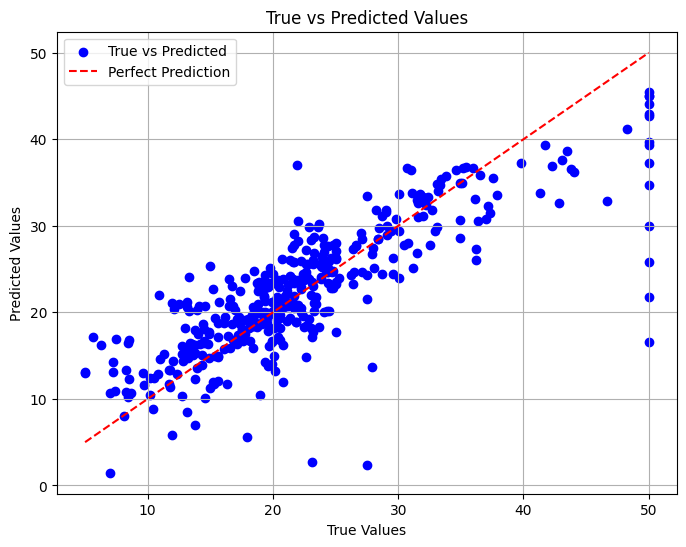

In [ ]:
#Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, predictions_train, c='blue', label='True vs Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

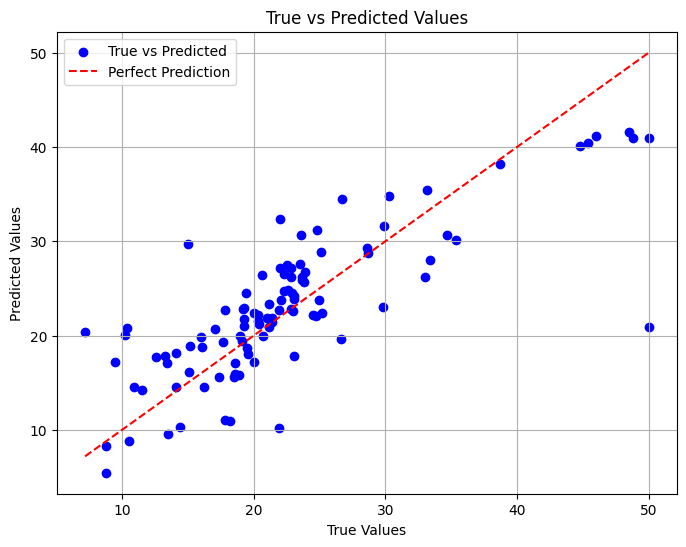

In [ ]:
#Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, c='blue', label='True vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X_train.head

<bound method NDFrame.head of          CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
403  2.432476 -0.479864  1.027405 -0.274265  1.194724 -1.332960  0.982510   
19  -0.331306 -0.479864 -0.431110 -0.274265 -0.144217 -0.794439  0.035090   
345 -0.411050 -0.479864 -0.980250 -0.274265 -0.973497 -0.385562 -0.715696   
160 -0.268437 -0.479864  1.244133  3.646110  0.434551 -0.049342  0.860954   
229  3.611874 -0.479864 -0.715199 -0.274265 -0.437921  0.380905 -1.684567   
..        ...       ...       ...       ...       ...       ...       ...   
154 -0.252321 -0.479864  1.244133  3.646110  2.732346 -0.221726  0.982510   
424  0.594664 -0.479864  1.027405 -0.274265  0.253146 -1.025233  0.074417   
385  1.515279 -0.479864  1.027405 -0.274265  1.255192 -1.435535  1.057588   
199 -0.411007  3.586081 -1.407847 -0.274265 -1.310392  0.983535 -1.902653   
272 -0.401468  0.376124 -0.603906 -0.274265 -0.783454  0.360960 -0.351029   

          DIS       RAD       TAX   PTRATIO  

In [ ]:
input_list = [[0.03, 0, 4, 0, 0.5, 6, 65, 5, 2, 250, 17, 395, 4]]

In [ ]:
input_list = scaler.transform(input_list)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
input_list

array([[-0.41117957, -0.47986431, -1.0373608 , -0.27426491, -0.47247397,
        -0.40550685, -0.12579304,  0.57279952, -0.8678825 , -0.93981522,
        -0.67298414,  0.42021965, -1.21919647]])

In [ ]:
input_list.shape

(1, 13)

In [ ]:
input_list = input_list.reshape(1,-1)

In [ ]:
input_list

array([[-0.41117957, -0.47986431, -1.0373608 , -0.27426491, -0.47247397,
        -0.40550685, -0.12579304,  0.57279952, -0.8678825 , -0.93981522,
        -0.67298414,  0.42021965, -1.21919647]])

In [ ]:
prediction_input = lr.predict(input_list)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
prediction_input

array([23.3838428])

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
feature_importance = model.feature_importances_

In [ ]:
feature_importance

array([0.02654994, 0.00176284, 0.00771605, 0.00263111, 0.03008687,
       0.50566692, 0.01667728, 0.08102667, 0.00637197, 0.01697837,
       0.01717498, 0.01453566, 0.27282136])

In [ ]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
403,2.432476,-0.479864,1.027405,-0.274265,1.194724,-1.332960,0.982510,-0.994588,1.661245,1.530926,0.806576,0.441052,0.986859
19,-0.331306,-0.479864,-0.431110,-0.274265,-0.144217,-0.794439,0.035090,0.000693,-0.637962,-0.601276,1.176466,0.375814,-0.200802
345,-0.411050,-0.479864,-0.980250,-0.274265,-0.973497,-0.385562,-0.715696,2.005372,-0.752922,-0.334008,0.159268,0.317593,-0.305719
160,-0.268437,-0.479864,1.244133,3.646110,0.434551,-0.049342,0.860954,-0.949142,-0.523001,-0.031105,-1.736418,-0.194662,-1.009362
229,3.611874,-0.479864,-0.715199,-0.274265,-0.437921,0.380905,-1.684567,-0.199628,-0.178120,-0.601276,-0.488039,0.259482,-1.252770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,-0.252321,-0.479864,1.244133,3.646110,2.732346,-0.221726,0.982510,-0.972435,-0.523001,-0.031105,-1.736418,-0.390924,0.336374
424,0.594664,-0.479864,1.027405,-0.274265,0.253146,-1.025233,0.074417,-0.823122,1.661245,1.530926,0.806576,-3.870682,0.621748
385,1.515279,-0.479864,1.027405,-0.274265,1.255192,-1.435535,1.057588,-1.126122,1.661245,1.530926,0.806576,0.441052,2.531238
199,-0.411007,3.586081,-1.407847,-0.274265,-1.310392,0.983535,-1.902653,1.834144,-0.752922,-0.037044,-0.672984,0.441052,-1.140858


In [ ]:
columns_to_remove = ['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X_train_featured = X_train.drop(columns=columns_to_remove)

In [ ]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
403,2.432476,-0.479864,1.027405,-0.274265,1.194724,-1.332960,0.982510,-0.994588,1.661245,1.530926,0.806576,0.441052,0.986859
19,-0.331306,-0.479864,-0.431110,-0.274265,-0.144217,-0.794439,0.035090,0.000693,-0.637962,-0.601276,1.176466,0.375814,-0.200802
345,-0.411050,-0.479864,-0.980250,-0.274265,-0.973497,-0.385562,-0.715696,2.005372,-0.752922,-0.334008,0.159268,0.317593,-0.305719
160,-0.268437,-0.479864,1.244133,3.646110,0.434551,-0.049342,0.860954,-0.949142,-0.523001,-0.031105,-1.736418,-0.194662,-1.009362
229,3.611874,-0.479864,-0.715199,-0.274265,-0.437921,0.380905,-1.684567,-0.199628,-0.178120,-0.601276,-0.488039,0.259482,-1.252770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,-0.252321,-0.479864,1.244133,3.646110,2.732346,-0.221726,0.982510,-0.972435,-0.523001,-0.031105,-1.736418,-0.390924,0.336374
424,0.594664,-0.479864,1.027405,-0.274265,0.253146,-1.025233,0.074417,-0.823122,1.661245,1.530926,0.806576,-3.870682,0.621748
385,1.515279,-0.479864,1.027405,-0.274265,1.255192,-1.435535,1.057588,-1.126122,1.661245,1.530926,0.806576,0.441052,2.531238
199,-0.411007,3.586081,-1.407847,-0.274265,-1.310392,0.983535,-1.902653,1.834144,-0.752922,-0.037044,-0.672984,0.441052,-1.140858


In [ ]:
X_train_featured

,CRIM,ZN
403,2.432476,-0.479864
19,-0.331306,-0.479864
345,-0.411050,-0.479864
160,-0.268437,-0.479864
229,3.611874,-0.479864
...,...,...
154,-0.252321,-0.479864
424,0.594664,-0.479864
385,1.515279,-0.479864
199,-0.411007,3.586081


In [ ]:
columns_to_remove = ['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X_test_featured = X_test.drop(columns=columns_to_remove)

In [ ]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
467,0.093030,-0.479864,1.027405,-0.274265,0.253146,-0.401233,0.928882,-0.596466,1.661245,1.530926,0.806576,-0.278320,1.203688
119,-0.398006,-0.479864,-0.157272,0.069959,-0.066472,-0.788740,-0.118643,-0.492408,-0.408041,0.141134,-0.303094,0.381844,0.125141
495,-0.394076,-0.479864,-0.204132,-0.274265,0.261784,-0.875644,-1.420005,-0.473678,-0.408041,-0.102376,0.344213,0.401471,0.683299
72,-0.404104,-0.479864,-0.040123,-0.274265,-1.224009,-0.312904,-2.170791,0.709373,-0.637962,-0.613155,0.344213,0.375375,-1.006565
172,-0.398651,-0.479864,-1.030039,-0.274265,-0.386091,-1.015261,0.714372,-0.569940,-0.523001,-0.666608,-0.857929,0.441052,0.276221
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,-0.411491,-0.479864,-0.587798,-0.274265,-0.740262,1.282714,-0.265225,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.215000
136,-0.377586,-0.479864,1.582403,-0.274265,0.598679,-0.488137,0.893131,-0.869043,-0.637962,0.170831,1.268938,0.236567,0.585377
418,8.026690,-0.479864,1.027405,-0.274265,1.073787,-0.466767,1.125517,-0.947146,1.661245,1.530926,0.806576,-3.730338,1.105765
429,0.657430,-0.479864,1.027405,-0.274265,1.073787,0.135863,68.518519,-0.868425,1.661245,1.530926,0.806576,-3.244946,1.589782


In [ ]:
X_test_featured

,CRIM,ZN
467,0.093030,-0.479864
119,-0.398006,-0.479864
495,-0.394076,-0.479864
72,-0.404104,-0.479864
172,-0.398651,-0.479864
...,...,...
2,-0.411491,-0.479864
136,-0.377586,-0.479864
418,8.026690,-0.479864
429,0.657430,-0.479864


In [ ]:
lr.fit(X_train_featured, y_train)

LinearRegression()

In [ ]:
predictions_featured = lr.predict(X_test_featured)

In [ ]:
predictions_featured

array([21.98830865, 23.03433816, 23.02596752, 23.04732818, 23.03571248,
       25.17790631, 25.48089994, 22.50719555, 22.76834834, 23.0450784 ,
       25.47963322, 25.33673691, 23.0063651 , 21.93338227, 22.77801505,
       23.66640818, 24.11693951, 23.06059698, 31.30570392, 23.42653485,
       23.04019003, 23.05258826, 25.48000737, 21.40657224, 23.03281711,
       19.56455895, 23.06012257, 21.07630234, 23.79557839, 23.05349551,
       23.02840559, 23.78452269, 21.64552803, 23.03973518, 22.82459769,
       25.48804054, 18.15815409, 22.16662069, 22.1291812 , 21.06435895,
        1.31139877, 23.05629551, 23.00865156, 31.33058842, 22.97784427,
       25.93689921, 23.69549974, 22.99262678, 16.08151747, 23.02693101,
       22.67146849, 22.94918405, 22.99190783, 22.87645019, 31.3304148 ,
       25.4826533 , 23.06182213, 21.36720601, 23.02367617, 23.05221656,
       15.09771008, 22.49971504, 23.01799058, 26.54383304, 22.16568166,
       23.6889118 , 25.17289566, 25.79092169, 23.59470937, 19.58

In [ ]:
predictions_featured.shape

(102,)

In [ ]:
predictions_train_featured = lr.predict(X_train_featured)

In [ ]:
mse_train_featured = mean_squared_error(y_train, predictions_train_featured)

In [ ]:
mse_train_featured

75.87076571982865